In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import neuro_morpho_toolbox as nmt
%matplotlib inline
#ns=nmt.neuron_set('/home/penglab/Documents/Janelia_1000')
import pickle
pickle_in = open("/home/penglab/FeaCal/ns.pickle","rb")
example_ = pickle.load(pickle_in)
ns= example_[0]

ModuleNotFoundError: No module named 'neuro_morpho_toolbox.neuron_set'

In [4]:
sf.loc[sf.Region.isin(ct.index[ct>10])]

,Hemisphere,Region
AA0002,1,MOp
AA0003,1,MOp
AA0004,1,MOp
AA0005,1,MOp
AA0006,1,MOp
AA0009,1,MOp
AA0010,1,MOs
AA0011,2,MOs
AA0012,2,MOs
AA0013,2,MOs


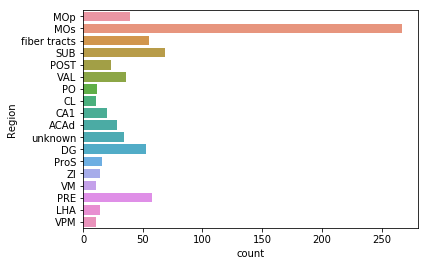

In [2]:
sf = ns.features['soma_features'].region
ct = sf["Region"].value_counts().sort_values(ascending=False)
_ = sns.countplot(y="Region", 
                  data=sf.loc[sf.Region.isin(ct.index[ct>10])],
                 )

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
/home/penglab/anaconda3/lib/python3.7/site-packages/pandas/core/ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, b

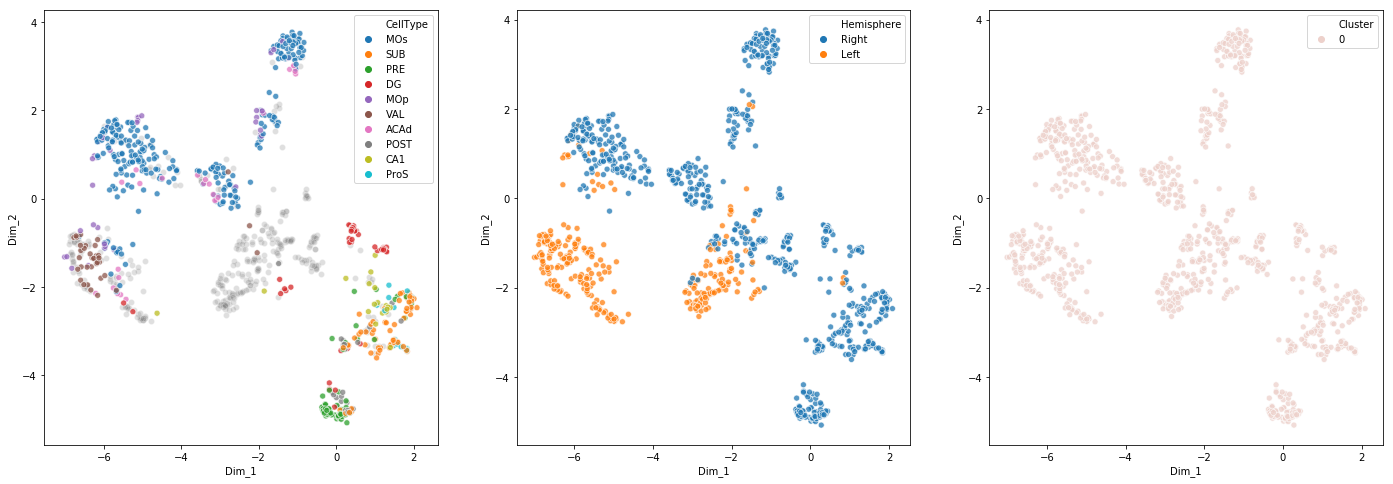

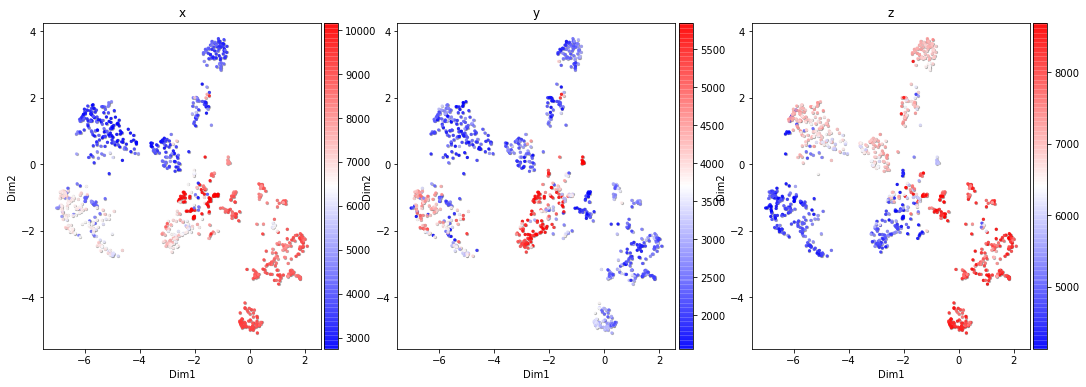

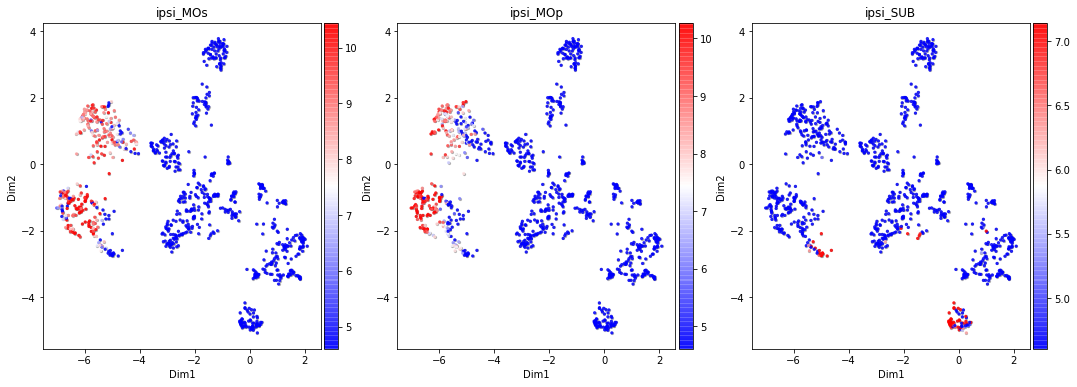

In [4]:
_ = ns.ReduceDimUMAP(feature_set="projection_features", n_neighbors=100)
_ = ns.FeatureScatter(["CellType", "Hemisphere", "Cluster"], map="UMAP")
_ = ns.FeatureScatter(["x", "y", "z"], map="UMAP")
_ = ns.FeatureScatter(["ipsi_MOs", "ipsi_MOp", "ipsi_SUB"], map="UMAP")

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


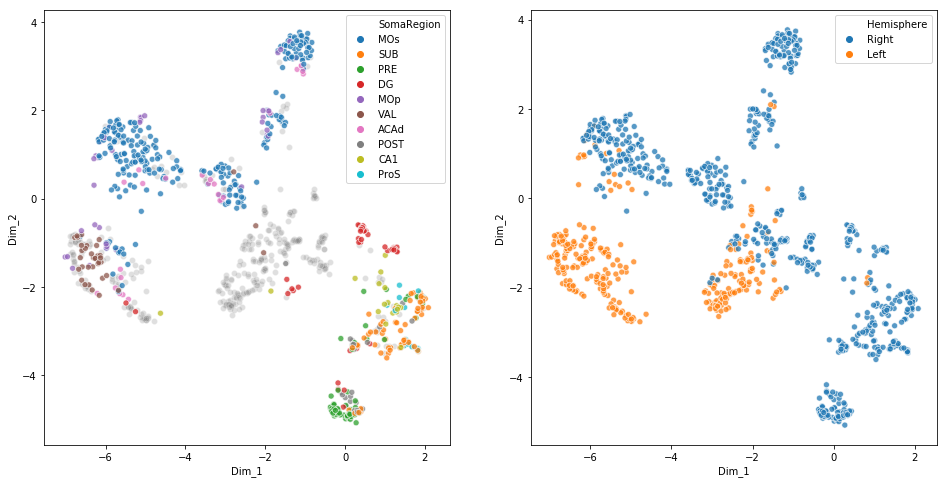

In [5]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

def FeatureScatter(self, feature_name, map="UMAP"):
    # Find feature values
    if type(feature_name) == list:
        z = self.get_feature_list_values(feature_list=feature_name)
    else:
        z = self.get_feature_values(feature_name=feature_name)
    # Find reduced dimension data
    if map == "UMAP":
        x = self.UMAP.iloc[:,0]
        y = self.UMAP.iloc[:,1]
    elif map == "PCA":
        x = self.PCA.iloc[:, 0]
        y = self.PCA.iloc[:, 1]
    else:
        assert True, "neuron_set.FeatureScatter(self, feature_name, map='UMAP'): Invalid map."
        return
    # If feature is categorical
    if z.select_dtypes(include=['float', 'int']).shape[1] == z.shape[1]: # If all values are numeric
        fig = quantitative_scatter(x, y, z)
    else:
        fig = qualitative_scatter(x, y, z)
    return fig

def quantitative_scatter(x, y, c, cmap='bwr', alpha=0.75, s=5):
    max_col = 3
    subplot_w = 6
    subplot_h = 6
    feature_list = c.columns.tolist()
    subplot_n = len(feature_list)
    if subplot_n<=max_col:
        n_col = subplot_n
        n_row = 1
    else:
        n_col = max_col
        n_row = int(subplot_n / max_col)
        if (subplot_n % max_col) != 0:
            n_row += 1
    fig, ax = plt.subplots(n_row, n_col,
                           figsize=(subplot_w * n_col,
                                    subplot_h * n_row),
                           squeeze=False
                           )
    ax = ax.reshape(-1)
    for i, cur_ax in enumerate(ax.tolist()[:subplot_n]):
        feature_name = c.columns.tolist()[i]
        cur_ax.scatter(x, y, 
                       c=(.5,.5,.5), 
                       s=s,
                       alpha=0.5)
        P = cur_ax.scatter(x, y, 
                           c=c[feature_name], 
                           cmap=cmap, 
                           s=s,
                           vmax=np.percentile(c[feature_name], q=95),
                           vmin=np.percentile(c[feature_name], q=5),
                           alpha=alpha)
        cur_ax.set_xlabel("Dim1")
        cur_ax.set_ylabel("Dim2")
        cur_ax.set_title(feature_name)
        # Creating color bar
        divider = make_axes_locatable(cur_ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)
        plt.colorbar(P, cax)
    return fig

def qualitative_scatter(x, y, c):
    max_col = 3
    subplot_w = 8
    subplot_h = 8
    feature_list = c.columns.tolist()
    subplot_n = len(feature_list)
    if subplot_n <= max_col:
        n_col = subplot_n
        n_row = 1
    else:
        n_col = max_col
        n_row = int(subplot_n / max_col)
        if (subplot_n % max_col) != 0:
            n_row += 1
    fig, ax = plt.subplots(n_row, n_col,
                           figsize=(subplot_w * n_col,
                                    subplot_h * n_row),
                           squeeze=False
                           )
    ax = ax.reshape(-1)
    df = pd.DataFrame({'Dim_1':x, 'Dim_2':y})
    df = pd.concat([df, c.copy()], axis=1)
    for i, cur_ax in enumerate(ax.tolist()[:subplot_n]):
        feature_name = feature_list[i]
        ct = df[feature_name].value_counts()
        # Control length of legend
        if len(ct)>10:
            collapsed_features = ct[12:].index.tolist() + ['unknown', "fiber tracts"]
            df.loc[df[feature_name].isin(collapsed_features), feature_name] = "Others"
        
        ct = df[feature_name].value_counts()
        hue_order = ct.index.tolist()
        if hue_order.count('Others') > 0:
#             hue_order.append(hue_order.pop(hue_order.index('Others')))
            hue_order.pop(hue_order.index('Others'))
        
        sns.scatterplot(x='Dim_1', y='Dim_2', 
                        data=df[df[feature_name]=='Others'], 
                        c=(.5,.5,.5),
                        alpha=0.25,
#                         palette='Spectral',
                        ax=cur_ax)
        sns.scatterplot(x='Dim_1', y='Dim_2', 
                        hue=feature_name, hue_order=hue_order, 
                        data=df[df[feature_name]!='Others'],
#                         palette='Spectral',
                        alpha=0.75,
                        ax=cur_ax)
    return fig

# fig = quantitative_scatter(Z_umap[0], Z_umap[1], tp_df[cluster_marker], cmap='Reds', alpha=0.85)
fig = FeatureScatter(ns, ["SomaRegion", "Hemisphere"])

## Testing PCA + UMAP


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

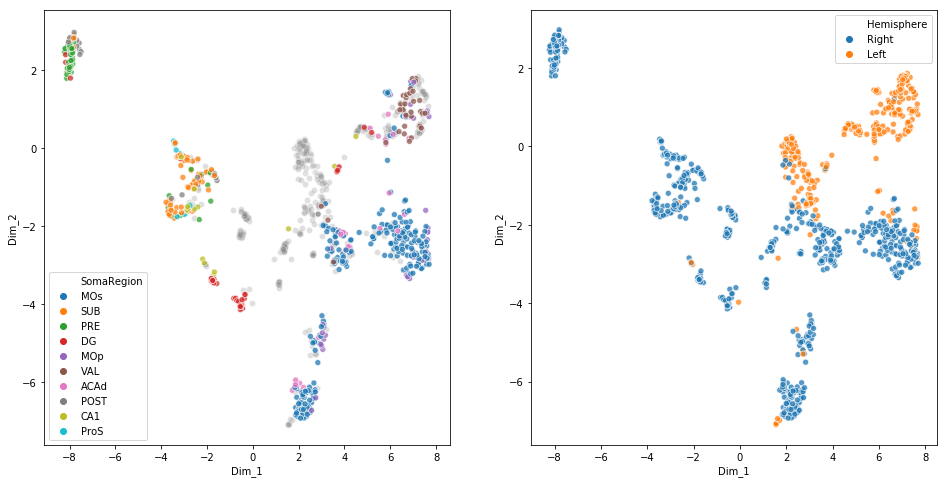

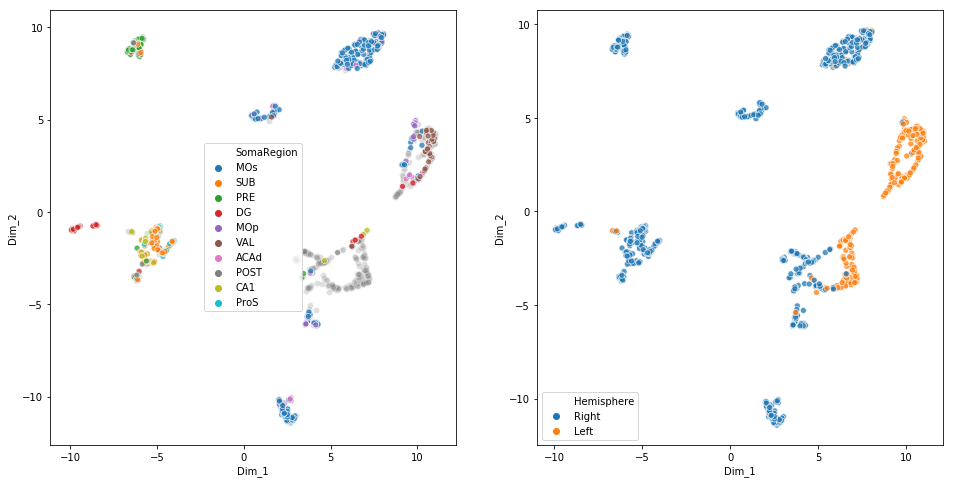

In [13]:
import umap
from sklearn.decomposition import PCA
df = ns.features["projection_features"].scaled_data.copy()
Z = PCA(n_components=500).fit_transform(df)
Z_pca = pd.DataFrame(Z, index=df.index)

umap_reducer = umap.UMAP(n_neighbors=25,
                         n_components=2)

Z = umap_reducer.fit_transform(df)
Z_umap = pd.DataFrame(Z, index=df.index)
fig = qualitative_scatter(Z_umap[0], Z_umap[1], pd.DataFrame(ns.metadata[["SomaRegion", "Hemisphere"]]))

for n_pc in [10]:
    Z = umap_reducer.fit_transform(Z_pca.iloc[:,:n_pc])
    Z_umap = pd.DataFrame(Z, index=df.index)
    fig = qualitative_scatter(Z_umap[0], Z_umap[1], pd.DataFrame(ns.metadata[["SomaRegion", "Hemisphere"]]))

In [14]:
from neuro_morpho_toolbox import get_clusters

knn_list = [10, 25]
clusters = pd.DataFrame(index=x.index)
for knn in knn_list:
    cur_colname = 'KNN_'+str(knn)
    print("%s..." % (cur_colname))
    cur_clusters = get_clusters(df, knn=knn, metric='minkowski', method='FastGreedy')
    cur_clusters = pd.DataFrame({cur_colname:['C'+str(i) for i in cur_clusters]}, 
                                index=x.index
                               )
    clusters = pd.concat([clusters, cur_clusters], axis=1)
    cur_colname = 'UMAP_KNN_'+str(knn)
    print("%s..." % (cur_colname))
    cur_clusters = get_clusters(Z_umap, knn=knn, metric='minkowski', method='FastGreedy')
    cur_clusters = pd.DataFrame({cur_colname:['C'+str(i) for i in cur_clusters]}, 
                                index=x.index
                               )
    clusters = pd.concat([clusters, cur_clusters], axis=1)

tp_df = pd.concat([ns.metadata['SomaRegion'], clusters], axis=1)
fig = qualitative_scatter(Z_umap[0], Z_umap[1], tp_df)

NameError: name 'x' is not defined

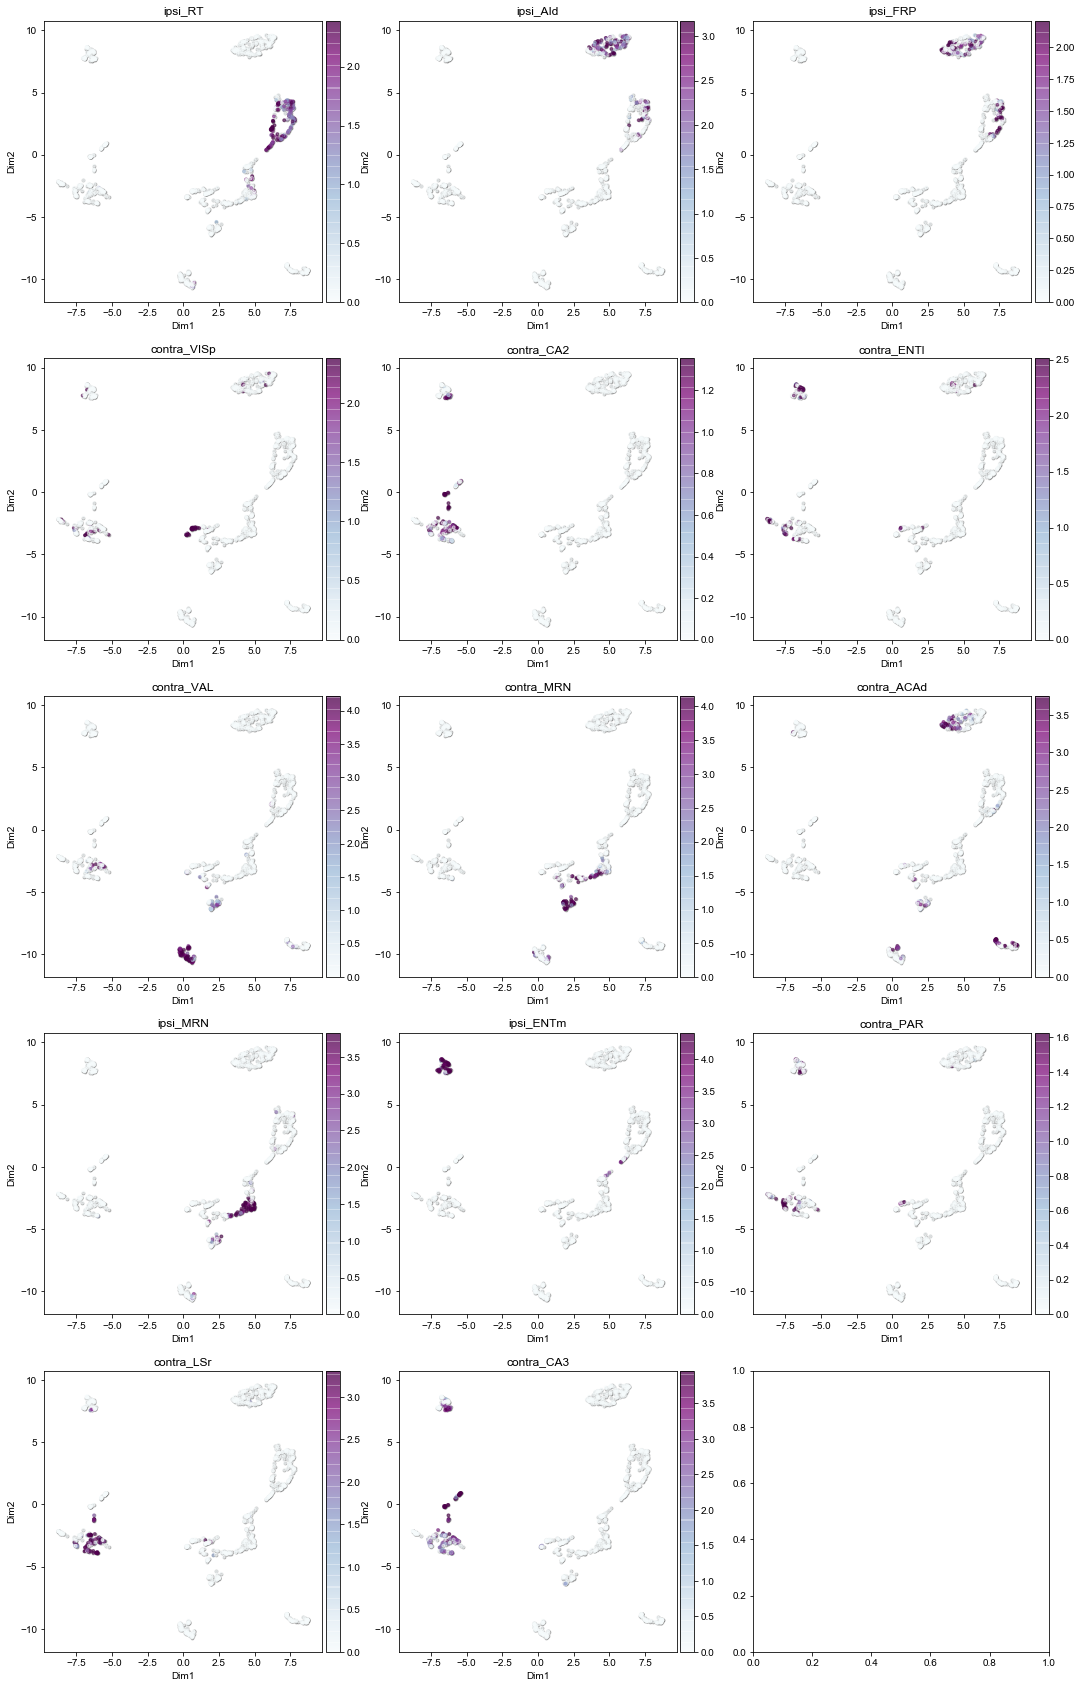

In [138]:
tp_df = df.copy()
tp_df = pd.concat([tp_df, clusters], axis=1)
tp_df.drop(['ipsi_fiber tracts', 'contra_fiber tracts'], axis=1, inplace=True)
med_df = tp_df.groupby('UMAP_KNN_10').median()
cluster_marker = []
for i in med_df.index.tolist():
    fg = med_df.loc[i]
    bg = med_df.loc[~med_df.index.isin([i])]
    fold = fg / bg.max()
    if not fold.idxmax() in cluster_marker:
        cluster_marker.append(fold.idxmax())

fig = quantitative_scatter(Z_umap[0], Z_umap[1], tp_df[cluster_marker] - np.log(100), cmap='BuPu', alpha=0.5, s=8)